# Wrangle and Analyze: WeRateDogs

## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gathering)
- [Assessing Data](#assessing)
- [Cleaning Data](#cleaning)
- [Storing, Analyzing, and Visualizing Data](#storing)

<a id='intro'></a>
# Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

### Import Libraries

In [1]:
import pandas as pd
import requests
import tweepy
import json
import time
import numpy as np
import seaborn  as sns
sns.set(style="ticks", color_codes=True)
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gathering'></a>
# Gathering Data
1. Imported the file `twitter_archive_enhanced.csv` that was provided from manually by Udacity as a DataFrame.

In [2]:
# Import the twitter-archive-enhanced-2.csv as a dataframe df_twitter_archive
df_twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
# Visualize the first five rows in df_twitter_archive
df_twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
# Visualize the info about df_twitter_archive
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Imported the file `image-predictions.tsv` that was provided from the url by Udacity as a DataFrame.

In [23]:
# Get file image-predictions.tsv from url and store in variable "response"
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [11]:
# Save the content from variable "response" to locally file image-predictions.tsv
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
# Import the image-predictions.tsv as a dataframe df_image_prediction
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
# Visualize the first five rows in df_image_prediction
df_image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [7]:
# Visualize the info about df_image_prediction
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Imported additional data from Twitter through the API

In [41]:
# Get list of tweets ids from df_twitter_archive
tweets_ids = df_twitter_archive.tweet_id.values

In [24]:
# Tokens to access "tweepy"
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [33]:
# Authentication to "tweepy". From "http://www.tweepy.org/"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(
    auth,
    parser=tweepy.parsers.JSONParser(),
    wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True
                )

In [42]:
# Create variables
list_tweets_data = [] # List to store tweets data
list_tweets_ids_success = [] # List to store tweets ids with success
list_tweets_ids_failure = [] # List to store tweets ids with failure

In [43]:
# Get tweets data from tweets ids
start = time.time()

for tweet_id in tweets_ids:
    try:
        data = api.get_status(tweet_id, tweet_mode='extended')
        list_tweets_ids_success.append(tweet_id)
        list_tweets_data.append(data)
    except:
        list_tweets_ids_failure.append(tweet_id)

end = time.time()
print('Time Total: {}'.format(end - start))
print('Total de Tweets IDs Success: {}'.format(len(list_tweets_ids_success)))
print('Total de Tweets IDs Failure: {}'.format(len(list_tweets_ids_failure)))

Rate limit reached. Sleeping for: 395
Rate limit reached. Sleeping for: 684


Time Total: 1943.8613197803497
Total de Tweets IDs Success: 2331
Total de Tweets IDs Failure: 25


In [48]:
# Store tweets data to tweet_json.txt
for tweet_data in list_tweets_data:
    with open('tweet_json.txt', mode = 'a') as file:
        file.write(json.dumps(tweet_data) + "\n")

In [8]:
# Import the tweet_json.txt as a dataframe df_tweet_json
df_tweet_json = pd.read_json('tweet_json.txt', lines=True)

In [9]:
# Visualize the first five rows in df_tweet_json
df_tweet_json.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorited  retweeted  possibly_sensitive  \
0  ...      False      False                 0.0   
1  ...      False      False                 0.0   
2  ...      False      False                 0.0   
3  ...      False      False                 0.0   
4  ...      False      False                 0.0   

  possibly_sensitive_appealable lang  retweeted_status  quoted_status_id  \
0                           0.0   en               NaN               NaN   
1                           0.0   en               NaN               NaN   
2                           0.0   en               NaN               NaN   
3                           0.0   en               NaN               NaN   
4                           0.0   en               NaN               NaN   

  quoted_status_id_str  quoted_status_permalink  quoted_status  
0                  NaN                      NaN            NaN  
1                  NaN                      NaN            NaN  
2                  NaN                      NaN            NaN  
3                  NaN                      NaN            NaN  
4                  NaN                      NaN            NaN  

[5 rows x 32 columns]

In [10]:
# Visualize the info about df_tweet_json
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [11]:
# Create DataFrame df_tweets_info_additional with columns "id", "retweet_count" and "favorite_count"
df_tweets_info_additional = df_tweet_json[['id', 'retweet_count', 'favorite_count']]

In [12]:
# Visualize the first five rows in df_tweets_info_additional
df_tweets_info_additional.head()

id  retweet_count  favorite_count
0  892420643555336193           7745           36418
1  892177421306343426           5736           31365
2  891815181378084864           3798           23633
3  891689557279858688           7910           39741
4  891327558926688256           8537           37934

In [13]:
# Visualize the info about df_tweets_info_additional
df_tweets_info_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


<a id='assessing'></a>
# Assessing Data

### Visual Assessment
1. Assessing visually the DataFrame `df_twitter_archive`

In [14]:
# Visualize df_twitter_archive
df_twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

2. Assessing visually the DataFrame `df_image_prediction`

In [15]:
# Visualize df_image_prediction
df_image_prediction

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

3. Assessing visually the DataFrame `df_tweets_info_additional`

In [16]:
# Visualize df_tweets_info_additional
df_tweets_info_additional

id  retweet_count  favorite_count
0     892420643555336193           7745           36418
1     892177421306343426           5736           31365
2     891815181378084864           3798           23633
3     891689557279858688           7910           39741
4     891327558926688256           8537           37934
...                  ...            ...             ...
2326  666049248165822465             41              98
2327  666044226329800704            133             274
2328  666033412701032449             41             113
2329  666029285002620928             42             121
2330  666020888022790149            464            2425

[2331 rows x 3 columns]

### Programmatic Assessment
1. Assessing programmatically the DataFrame `df_twitter_archive`

In [17]:
# Visualize the first five rows in df_twitter_archive
df_twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [18]:
# Visualize the last five rows in df_twitter_archive
df_twitter_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [19]:
# Visualize the info about df_twitter_archive
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# Verify statistics values
df_twitter_archive.describe().T

count          mean           std           min  \
tweet_id                  2356.0  7.427716e+17  6.856705e+16  6.660209e+17   
in_reply_to_status_id       78.0  7.455079e+17  7.582492e+16  6.658147e+17   
in_reply_to_user_id         78.0  2.014171e+16  1.252797e+17  1.185634e+07   
retweeted_status_id        181.0  7.720400e+17  6.236928e+16  6.661041e+17   
retweeted_status_user_id   181.0  1.241698e+16  9.599254e+16  7.832140e+05   
rating_numerator          2356.0  1.312649e+01  4.587665e+01  0.000000e+00   
rating_denominator        2356.0  1.045543e+01  6.745237e+00  0.000000e+00   

                                   25%           50%           75%  \
tweet_id                  6.783989e+17  7.196279e+17  7.993373e+17   
in_reply_to_status_id     6.757419e+17  7.038708e+17  8.257804e+17   
in_reply_to_user_id       3.086374e+08  4.196984e+09  4.196984e+09   
retweeted_status_id       7.186315e+17  7.804657e+17  8.203146e+17   
retweeted_status_user_id  4.196984e+09  4.196984e+09  4.196984e+09   
rating_numerator          1.000000e+01  1.100000e+01  1.200000e+01   
rating_denominator        1.000000e+01  1.000000e+01  1.000000e+01   

                                   max  
tweet_id                  8.924206e+17  
in_reply_to_status_id     8.862664e+17  
in_reply_to_user_id       8.405479e+17  
retweeted_status_id       8.874740e+17  
retweeted_status_user_id  7.874618e+17  
rating_numerator          1.776000e+03  
rating_denominator        1.700000e+02

In [21]:
# Verify values nulls
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
# Verify tweet_id duplicated
df_twitter_archive['tweet_id'].duplicated().sum()

0

In [23]:
# Verify tweet_id duplicated
df_twitter_archive[~df_twitter_archive['expanded_urls'].isnull()]['expanded_urls'].duplicated().sum()

79

In [24]:
# Verify values in column
df_twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1                                        2
https://twitter.com/dog_rates/status/700747788515020802/photo/1                                                                                                                                                                                                                                        2
https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1    2
https://twitter.com/dog_rates/status/667182792070062081/photo/1                                              

In [25]:
# Verify values in column
df_twitter_archive['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [26]:
# Verify values in column
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
# Verify values in column
df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
# Verify values in column
df_twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Tom          1
Amy          1
such         1
Harry        1
Stuart       1
Name: name, Length: 957, dtype: int64

In [29]:
# Verify values in column
df_twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
# Verify values in column
df_twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [31]:
# Verify values in column
df_twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [32]:
# Verify values in column
df_twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

2. Assessing programmatically the DataFrame `df_image_prediction`

In [33]:
# Visualize the first five rows in df_image_prediction
df_image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [34]:
# Visualize the last five rows in df_image_prediction
df_image_prediction.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [35]:
# Visualize the info about df_image_prediction
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
# Verify statistics values
df_image_prediction.describe().T

count          mean           std           min           25%  \
tweet_id  2075.0  7.384514e+17  6.785203e+16  6.660209e+17  6.764835e+17   
img_num   2075.0  1.203855e+00  5.618750e-01  1.000000e+00  1.000000e+00   
p1_conf   2075.0  5.945483e-01  2.711735e-01  4.433340e-02  3.644120e-01   
p2_conf   2075.0  1.345886e-01  1.006657e-01  1.011300e-08  5.388625e-02   
p3_conf   2075.0  6.032417e-02  5.090593e-02  1.740170e-10  1.622240e-02   

                   50%           75%           max  
tweet_id  7.119988e+17  7.932034e+17  8.924206e+17  
img_num   1.000000e+00  1.000000e+00  4.000000e+00  
p1_conf   5.882300e-01  8.438550e-01  1.000000e+00  
p2_conf   1.181810e-01  1.955655e-01  4.880140e-01  
p3_conf   4.944380e-02  9.180755e-02  2.734190e-01

In [37]:
# Verify values nulls
df_image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [38]:
# Verify tweet_id duplicated
df_image_prediction['tweet_id'].duplicated().sum()

0

In [39]:
# Verify tweet_id duplicated
df_image_prediction[~df_image_prediction['jpg_url'].isnull()]['jpg_url'].duplicated().sum()

66

In [40]:
# Verify values in column
df_image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [41]:
# Verify values in column
df_image_prediction['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [42]:
# Verify values in column
df_image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [43]:
# Verify images classfied as non-dogs
df_image_prediction[(df_image_prediction['p1_dog'] == False) & (df_image_prediction['p2_dog'] == False) & (df_image_prediction['p3_dog'] == False)].count()[0]

324

3. Assessing programmatically the DataFrame `df_tweets_info_additional`

In [44]:
# Visualize the first five rows in df_tweets_info_additional
df_tweets_info_additional.head()

id  retweet_count  favorite_count
0  892420643555336193           7745           36418
1  892177421306343426           5736           31365
2  891815181378084864           3798           23633
3  891689557279858688           7910           39741
4  891327558926688256           8537           37934

In [45]:
# Visualize the last five rows in df_tweets_info_additional
df_tweets_info_additional.tail()

id  retweet_count  favorite_count
2326  666049248165822465             41              98
2327  666044226329800704            133             274
2328  666033412701032449             41             113
2329  666029285002620928             42             121
2330  666020888022790149            464            2425

In [46]:
# Visualize the info about df_tweets_info_additional
df_tweets_info_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [47]:
# Verify statistics values
df_tweets_info_additional.describe().T

count          mean           std           min  \
id              2331.0  7.419079e+17  6.823170e+16  6.660209e+17   
retweet_count   2331.0  2.719855e+03  4.600849e+03  1.000000e+00   
favorite_count  2331.0  7.607260e+03  1.180495e+04  0.000000e+00   

                         25%           50%           75%           max  
id              6.782670e+17  7.182469e+17  7.986692e+17  8.924206e+17  
retweet_count   5.495000e+02  1.275000e+03  3.158000e+03  7.831700e+04  
favorite_count  1.328500e+03  3.311000e+03  9.323500e+03  1.572610e+05

In [48]:
# Verify values nulls
df_tweets_info_additional.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [51]:
# Number of tweets ids that were not found in the API.
len(list_tweets_ids_failure)

25

In [52]:
# Verify id duplicated
df_tweets_info_additional['id'].duplicated().sum()

0

### Quality Issues
- df_twitter_archive:
    - Column `name` with some dogs have 'None' as a name, or 'a'.
    - Erroneous datatypes (`timestamp`)
    - Nulls values in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and `expanded_urls`.
    - Values in inconsistent in columns `rating_denominator` and `rating_numerator`.
    - Nulls represented as `None` (`doggo`, `floofer`, `pupper` and `puppo`).
    - Values in column `retweeted_status_id` indicates retweeted.
    - Nulls values in columns `retweet_count` and `favorite_count`.
- df_image_prediction:
    - Duplicated in column `jpg_url` indicates retweeted.
    - There are images that have been classified as non-dogs.

### Tidiness Issues
- df_twitter_archive:
    - The last four columns all relate to the same variable (dogoo, floofer, pupper, puppo).
- df_image_prediction:
    - This data set is part of the same observational unit as the data in the df_twitter_archive.
- df_tweets_info_additional:
    - The id column with name different from the other tables.
    - This data set is part of the same observational unit as the data in the df_twitter_archive.
    
<a id='cleaning'></a>
# Cleaning Data

In [53]:
# Create copies of datasets
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_prediction_clean = df_image_prediction.copy()
df_tweets_info_additional_clean = df_tweets_info_additional.copy()

### Tidiness Issues
#### df_twitter_archive - The last four columns all relate to the same variable (dogoo, floofer, pupper, puppo)

#####  Define
Extract the *doggo*, *floofer*, *pupper* and *puppo* values from column `text` to a *dog_stage* and drop columns `doggo`, `floofer`, `pupper` and `puppo`

##### Code

In [62]:
# Function that uses sets to create one column in df_twitter_archive_clean

# Create a set first
dog_stages = set(['doggo', 'floofer', 'pupper', 'puppo'])

def calc_dog_stage(stages):

    # Stages is a list. Convert it to a set
    stages = set(stages)

    # This gives you all possible combinations
    stages = stages.intersection(dog_stages)

    # This concatenates the multiple stages
    stages = '_'.join(stages)

    return stages

In [63]:
# Create the column 'dog_stage' applying the function
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean[['doggo', 'floofer', 
    'pupper', 'puppo']].apply(calc_dog_stage, axis = 1)

In [64]:
# Set "dog_stage" as category type
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean['dog_stage'].astype('category')

In [65]:
# Drop columns "doggo", "floofer", "pupper" and "puppo"
df_twitter_archive_clean = df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [66]:
# Verify columns from dataset
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  dog_stage         

In [72]:
# Verify values from column "dog_stage"
df_twitter_archive_clean['dog_stage'].value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo_pupper       12
floofer             9
doggo_puppo         1
doggo_floofer       1
Name: dog_stage, dtype: int64

#### df_image_prediction - This data set is part of the same observational unit as the data in the df_twitter_archive

#####  Define
Join df_image_prediction with df_twitter_archive using `tweet_id` as key

##### Code

In [73]:
# Merge datasets by "twwet_id" as key
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_prediction_clean, on=['tweet_id'], how='left')

##### Test

In [74]:
# Verify columns from dataset 
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  dog_stage         

#### df_tweets_info_additional - The id column with name different from the other tables

#####  Define
Change column name of `id` to `tweet_id`

##### Code

In [75]:
# Rename column
df_tweets_info_additional_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

##### Test

In [76]:
# Verify columns from dataset 
df_tweets_info_additional_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


#### df_tweets_info_additional - This data set is part of the same observational unit as the data in the df_twitter_archive

#####  Define
Join df_tweets_info_additional with df_twitter_archive using `tweet_id` as key

##### Code

In [77]:
# Merge datasets by "twwet_id" as key
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweets_info_additional_clean, on=['tweet_id'], how='left')

##### Test

In [78]:
# Verify columns from dataset 
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  dog_stage         

### Quality Issues
#### df_twitter_archive - Column name with some dogs have 'None' as a name, or 'a'

#####  Define
Replace values `None` and `a` to `nan`

##### Code

In [79]:
# Replace values "None" and "a" to "nan"
df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].replace('None', np.nan)
df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].replace('a', np.nan)

##### Test

In [80]:
#Verify values from column "name"
df_twitter_archive_clean['name'].value_counts()

Charlie    12
Lucy       11
Oliver     11
Cooper     11
Lola       10
           ..
Tom         1
Amy         1
such        1
Harry       1
Stuart      1
Name: name, Length: 955, dtype: int64

#### df_twitter_archive - Erroneous datatypes (timestamp)

#####  Define
Change datatype of column `timestamp` to datetime.

##### Code

In [81]:
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])

##### Test

In [82]:
# Verify type of columns
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### df_twitter_archive - Values in column retweeted_status_id indicates retweeted.

#####  Define
Drop rows with id in column `retweeted_status_id`. Because they are retweeted

##### Code

In [83]:
# Filter rows with null values in "retweeted_status_id"
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull()]

##### Test

In [84]:
# Verify info of columns
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [85]:
# Verify if values in "retweeted_status_id"
df_twitter_archive_clean['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### df_image_prediction - Duplicated in column jpg_url indicates retweeted

#####  Define
Drop rows with id in column `retweeted_status_id`. Because they are retweeted

##### Code

In [86]:
# Because we joined the datasets previously, this problem was solved together with the solution to the "df_twitter_archive - Values in column retweeted_status_id indicates retweeted"

##### Test

In [87]:
# Verify retweeted
df_twitter_archive_clean[~df_twitter_archive_clean['jpg_url'].isnull()]['jpg_url'].duplicated().sum()

0

#### df_twitter_archive - Nulls represented as None (doggo, floofer, pupper and puppo).

#####  Define
Replace values "None" to "nan".

##### Code

In [88]:
# Replace para numpy.nan
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean['dog_stage'].replace('', np.nan)

##### Test

In [89]:
# Verify values
df_twitter_archive_clean['dog_stage'].value_counts()

pupper           224
doggo             75
puppo             24
doggo_pupper      10
floofer            9
doggo_puppo        1
doggo_floofer      1
Name: dog_stage, dtype: int64

In [90]:
# Verify values nulls
df_twitter_archive_clean['dog_stage'].isnull().sum()

1831

#### df_image_prediction - There are images that have been classified as non-dogs.

#####  Define
Remove rows that were classified as non-dogs in the 3 algorithms. 

##### Code

In [91]:
# Remove rows that were classified as non-dogs in the 3 algorithms.
df_twitter_archive_clean = df_twitter_archive_clean[~((df_twitter_archive_clean['p1_dog'] == False) & (df_twitter_archive_clean['p2_dog'] == False) & (df_twitter_archive_clean['p3_dog'] == False))]

##### Test

In [92]:
# Verify rows that were classified as non-dogs in the 3 algorithms.
df_twitter_archive_clean[((df_twitter_archive_clean['p1_dog'] == False) & (df_twitter_archive_clean['p2_dog'] == False) & (df_twitter_archive_clean['p3_dog'] == False))]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_stage, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, retweet_count, favorite_count]
Index: []

[0 rows x 27 columns]

#### df_twitter_archive - Nulls values in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls.

#####  Define
Drop columns 

##### Code

In [93]:
# Drop columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" and "expanded_urls".
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

##### Test

In [94]:
# Verify info of columns
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1867 non-null   int64              
 1   timestamp           1867 non-null   datetime64[ns, UTC]
 2   source              1867 non-null   object             
 3   text                1867 non-null   object             
 4   rating_numerator    1867 non-null   int64              
 5   rating_denominator  1867 non-null   int64              
 6   name                1268 non-null   object             
 7   dog_stage           298 non-null    category           
 8   jpg_url             1686 non-null   object             
 9   img_num             1686 non-null   float64            
 10  p1                  1686 non-null   object             
 11  p1_conf             1686 non-null   float64            
 12  p1_dog              1686 non-null 

#### df_twitter_archive - Values inconsistent in columns rating_denominator and rating_numerator.

#####  Define
Extract values from "text" by regex, drop rows with "rating_denominator" different 10 and drop rows with "rating_numerator" greater than 20

##### Code

In [95]:
# Extract values from column "text"
df_twitter_archive_clean[['rating_numerator', 'rating_denominator']] = df_twitter_archive_clean['text'].str.extract('([0-9]+\.[0-9]+|[0-9]+)\/([0-9]+\.[0-9]+|[0-9]+)', expand=False)

In [108]:
# Set "rating_numerator" as float type and "rating_denominator" as int type
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean['rating_numerator'].astype('float')
df_twitter_archive_clean['rating_denominator'] = df_twitter_archive_clean['rating_denominator'].astype('int')

In [115]:
# Filter rows with "rating_denominator" equal 10 and "rating_numerator" equal or less than 20
df_twitter_archive_clean = df_twitter_archive_clean[(df_twitter_archive_clean['rating_denominator'] == 10) & (df_twitter_archive_clean['rating_numerator'] <= 20)]

##### Test

In [116]:
# Verify values
df_twitter_archive_clean['rating_numerator'].value_counts()

12.00    473
11.00    385
10.00    383
13.00    275
9.00     137
8.00      71
7.00      33
14.00     31
6.00      16
5.00      15
4.00       6
3.00       5
1.00       3
2.00       2
9.75       1
11.26      1
0.00       1
15.00      1
9.50       1
17.00      1
13.50      1
11.27      1
Name: rating_numerator, dtype: int64

In [117]:
# Verify values
df_twitter_archive_clean['rating_denominator'].value_counts()

10    1843
Name: rating_denominator, dtype: int64

In [118]:
# Verify info from columns
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 1 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1843 non-null   int64              
 1   timestamp           1843 non-null   datetime64[ns, UTC]
 2   source              1843 non-null   object             
 3   text                1843 non-null   object             
 4   rating_numerator    1843 non-null   float64            
 5   rating_denominator  1843 non-null   int64              
 6   name                1264 non-null   object             
 7   dog_stage           298 non-null    category           
 8   jpg_url             1669 non-null   object             
 9   img_num             1669 non-null   float64            
 10  p1                  1669 non-null   object             
 11  p1_conf             1669 non-null   float64            
 12  p1_dog              1669 non-null 

#### df_twitter_archive - Nulls values in columns retweet_count and favorite_count.

#####  Define
Drop rows com nulls values

##### Code

In [119]:
# Filter rows with nulls values in "retweet_count" and "favorite_count"
df_twitter_archive_clean = df_twitter_archive_clean[~((df_twitter_archive_clean['retweet_count'].isnull()) & (df_twitter_archive_clean['favorite_count'].isnull()))]

##### Test

In [120]:
# Verify info columns
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 1 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1836 non-null   int64              
 1   timestamp           1836 non-null   datetime64[ns, UTC]
 2   source              1836 non-null   object             
 3   text                1836 non-null   object             
 4   rating_numerator    1836 non-null   float64            
 5   rating_denominator  1836 non-null   int64              
 6   name                1257 non-null   object             
 7   dog_stage           297 non-null    category           
 8   jpg_url             1662 non-null   object             
 9   img_num             1662 non-null   float64            
 10  p1                  1662 non-null   object             
 11  p1_conf             1662 non-null   float64            
 12  p1_dog              1662 non-null 

In [121]:
# Verify null values
df_twitter_archive_clean['retweet_count'].isnull().sum()

0

In [122]:
# Verify null values
df_twitter_archive_clean['favorite_count'].isnull().sum()

0

<a id='storing'></a>
# Storing, Analyzing, and Visualizing Data

## Store

In [123]:
# Store clean dataset
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyze and Visualize
1. Analyzing the behavior of quantity of tweets over time
2. Analyzing the correlation between the number of favorites and retweets
3. Analyzing the distribution of dogs stages
4. Most frequent dog names 
5. Analyzing the distribution of rating numerator

### 1. Analyzing the behavior of quantity of tweets over time

In [124]:
# Aggreggation sum tweets by month
df_tweets_monthly = df_twitter_archive_clean.groupby(pd.Grouper(key = 'timestamp', freq = "M"))['tweet_id'].count().reset_index()

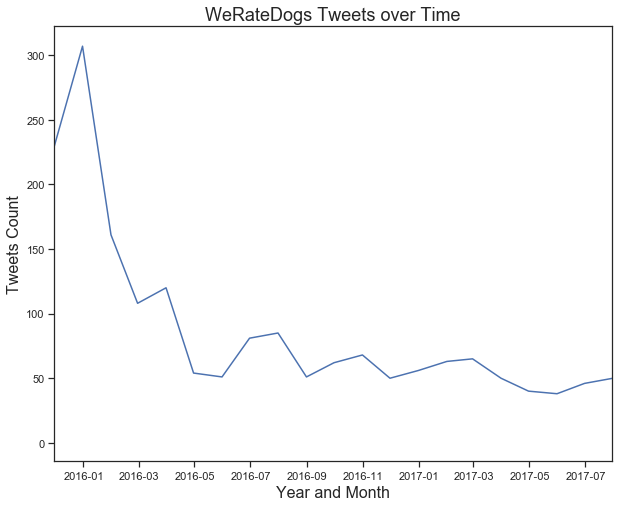

In [125]:
# Plotting time vs. tweets
plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 

plt.xlabel('Year and Month', fontsize=16)
plt.ylabel('Tweets Count', fontsize=16)

plt.plot(df_tweets_monthly.timestamp, df_tweets_monthly.tweet_id)
plt.title('WeRateDogs Tweets over Time', fontsize=18);

**We had a large amount of new tweets when the profile was created (November 2015), but still in the beginning of 2016 we have a sharp drop that slows down in the middle of the year and the downward trend continues throughout 2017.**

### 2. Analyzing the correlation between the number of favorites and retweets

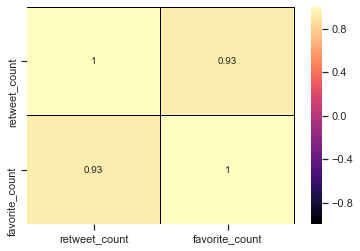

In [126]:
# Visualizing the correlation between the number of favorites and retweets
sns.heatmap(df_twitter_archive_clean[['retweet_count', 'favorite_count']].corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='magma', linewidths=.5, linecolor='black');

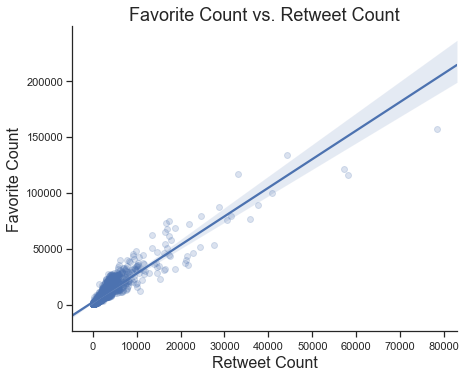

In [127]:
# Scatterplot of retweets vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_twitter_archive_clean,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count', fontsize=18);
plt.xlabel('Retweet Count', fontsize=16);
plt.ylabel('Favorite Count', fontsize=16);

**There is a strong and positive correlation between the amount of retweet and favorites. We can say that the more a bet is retweeted, the more favorites it receives.**

### 3. Analyzing the distribution of dogs stages

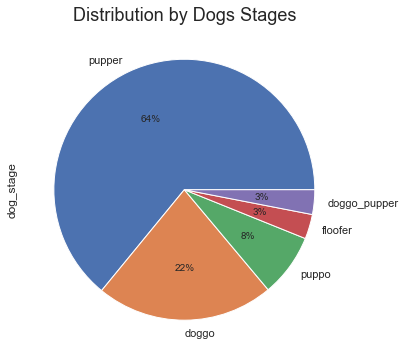

In [155]:
# Pie plot distribution os dogs stages
plt.figure(figsize=(8, 6))
plt.title('Distribution by Dogs Stages', fontsize=18)
(df_twitter_archive_clean['dog_stage'].value_counts(normalize=True)[df_twitter_archive_clean['dog_stage'].value_counts(normalize=True) > 0.01] * 100).plot.pie(autopct='%1.0f%%');

**Analyzing the plot above, we can see that of the dataset records with the dog stage information the majority is Pupper with 64% and the smallest is the Floofer and Doggo_Pupper with only 3%.**

### 4. Most frequent dog names

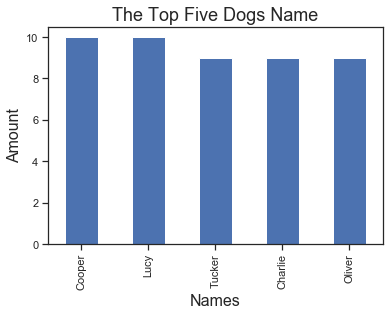

In [156]:
# Bar Plot with the top five dog names.
plt.title('The Top Five Dogs Name', fontsize=18)
plt.xlabel('Names', fontsize=16)
plt.ylabel('Amount', fontsize=16)
df_twitter_archive_clean['name'].value_counts().head(5).plot(kind='bar');

**We found that the most frequent names in the dataset are Lucy and Cooper.**

### 5. Analyzing the distribution of rating numerator

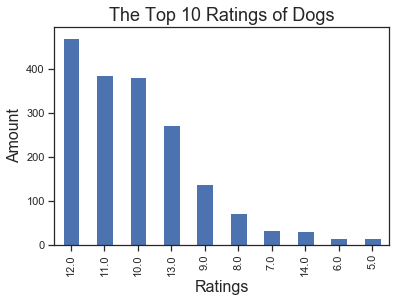

In [157]:
plt.title('The Top 10 Ratings of Dogs', fontsize=18)
plt.xlabel('Ratings', fontsize=16)
plt.ylabel('Amount', fontsize=16)
df_twitter_archive_clean['rating_numerator'].value_counts().head(10).plot(kind='bar');

**Most registered notes are equal to or greater than 10, with note 12 being more frequent.**